In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import shap

# Optional: Show all columns when displaying DataFrames
pd.set_option('display.max_columns', None)


In [2]:
# Step 2: Load the dataset from URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [3]:
# Check dataset info and column names (important for feature selection)
print("Column names:", df.columns.tolist())
df.info()


Column names: ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex    

In [4]:
# Step 3: Prepare feature set (X) and target (y)

# The label column is 'credit_risk'
target_col = 'credit_risk'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Convert categorical/string columns into numeric form using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check transformed feature matrix and label
print("Feature columns:", X.columns.tolist())
X.head()


Feature columns: ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable', 'status_... >= 200 DM / salary for at least 1 year', 'status_0 <= ... < 200 DM', 'status_no checking account', 'credit_history_critical account/other credits existing', 'credit_history_delay in paying off in the past', 'credit_history_existing credits paid back duly till now', 'credit_history_no credits taken/all credits paid back duly', 'purpose_car (new)', 'purpose_car (used)', 'purpose_domestic appliances', 'purpose_education', 'purpose_furniture/equipment', 'purpose_others', 'purpose_radio/television', 'purpose_repairs', 'purpose_retraining', 'savings_... >= 1000 DM', 'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM', 'savings_unknown/no savings account', 'employment_duration_... >= 7 years', 'employment_duration_1 <= ... < 4 years', 'employment_duration_4 <= ... < 7 years', 'employment_duration_unemployed', 'personal_status_sex_male : divorced/sepa

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,status_no checking account,credit_history_critical account/other credits existing,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_others,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... >= 1000 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/no savings account,employment_duration_... >= 7 years,employment_duration_1 <= ... < 4 years,employment_duration_4 <= ... < 7 years,employment_duration_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,telephone_yes,foreign_worker_yes
0,6,1169,4,4,67,2,1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True
1,48,5951,2,2,22,1,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True
2,12,2096,2,3,49,1,2,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,True
3,42,7882,2,4,45,1,2,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,True
4,24,4870,3,4,53,2,2,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,True


In [5]:
# Step 4: Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (800, 48)
Test shape: (200, 48)


In [9]:
# Step 5: Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
# Step 6: Evaluate prediction accuracy on the test set
test_accuracy = clf.score(x_test, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")


Test set accuracy: 0.7700


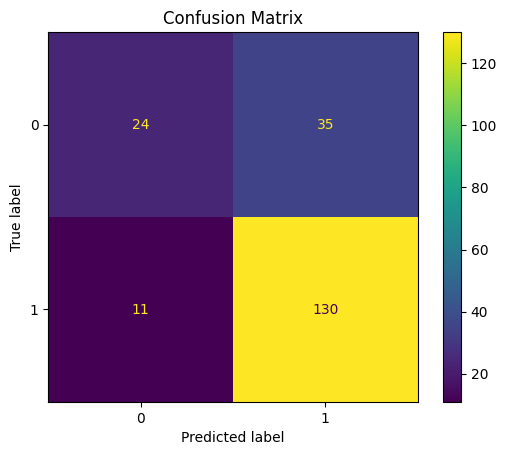

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)
plt.title("Confusion Matrix")
plt.show()


Generating SHAP summary plot...


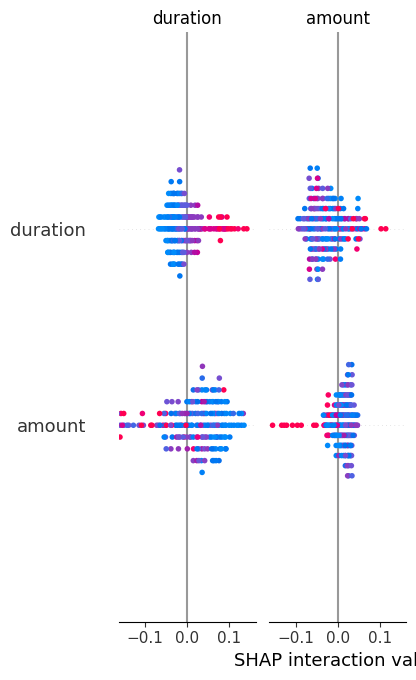

In [13]:
# Step 7: Explain the model's global decisions using SHAP
# This will show which features are most important overall

# Initialize SHAP explainer (for tree-based models)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_test)

print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, x_test)
